# Part1. 기본 세팅

## 1. import library

In [2]:
pip install finance-datareader

In [12]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as ss
from IPython.display import set_matplotlib_formats
import plotly.express as px

In [13]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [14]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Part 2. 파일 세팅

## 1. Stock Info

In [15]:
#코스피 지수 불러오기
ks_17 = fdr.DataReader('KS11', '2006-09-20', '2008-01-20')
ks_17.tail(60)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2007-10-23,1947.98,1936.92,1952.32,1909.61,371170000.0,0.0232
2007-10-24,1933.36,1966.55,2003.20,1923.07,481130000.0,-0.0075
2007-10-25,1976.75,1967.08,1982.19,1941.05,453610000.0,0.0224
2007-10-26,2028.06,1987.20,2028.07,1968.82,438860000.0,0.0260
2007-10-29,2062.92,2051.62,2070.86,2044.09,481230000.0,0.0172
2007-10-30,2052.37,2058.78,2066.00,2037.75,402150000.0,-0.0051
2007-10-31,2064.85,2052.60,2065.53,2043.93,365440000.0,0.0061
2007-11-01,2063.14,2085.33,2085.45,2048.68,401960000.0,-0.0008
2007-11-02,2019.34,2014.65,2049.62,2014.65,388390000.0,-0.0212


In [6]:
lee_17 = {
    '삼호개발': '010960',
    '이화공영': '001840',
    '홈센타홀딩스': '060560',
    '특수건설': '026150',
    '동신건설': '025950'}

In [7]:
item_list_lee = []
for item_code in lee_17.values():
    close = fdr.DataReader(item_code, '2006-09-20', '2008-01-20')['Close']
    item_list_lee.append(close)

In [8]:
#테마주 종가 피벗테이블 만들기
lee = pd.concat(item_list_lee,axis=1)
lee.columns = lee_17.keys()

lee["ks_17"] = ks_17["Close"]

lee_norm = (lee - lee.min()) / (lee.max() - lee.min())
lee_norm

,삼호개발,이화공영,홈센타홀딩스,특수건설,동신건설,ks_17
Date,,,,,,
2006-09-20,0.011068,0.009461,0.022983,0.002062,0.008892,0.063103
2006-09-21,0.011068,0.009783,0.023765,0.002459,0.010753,0.063572
2006-09-22,0.010498,0.007166,0.022670,0.003622,0.003929,0.038876
2006-09-25,0.005186,0.005878,0.023765,0.002168,0.009926,0.048038
2006-09-26,0.004680,0.005193,0.024234,0.002168,0.009719,0.032960
...,...,...,...,...,...,...
2008-01-14,0.497786,0.425621,0.198718,0.394776,0.402399,0.598940
2008-01-15,0.506008,0.394380,0.190432,0.406514,0.476840,0.573546
2008-01-16,0.442006,0.331817,0.165729,0.345786,0.392060,0.517231


In [9]:
#60일 이동평균선 만들기 위해 데이터 60일 뒤로 미루기
lee_norm["삼호개발_MA60"] = lee_norm["삼호개발"].rolling(60).mean()
lee_norm["이화공영_MA60"] = lee_norm["이화공영"].rolling(60).mean()
lee_norm["홈센타홀딩스_MA60"] = lee_norm["홈센타홀딩스"].rolling(60).mean()
lee_norm["특수건설_MA60"] = lee_norm["특수건설"].rolling(60).mean()
lee_norm["동신건설_MA60"] = lee_norm["동신건설"].rolling(60).mean()
lee_norm["ks_17_MA60"] = lee_norm["ks_17"].rolling(60).mean()

In [10]:
# UpperB, LowerB 구해 볼린저 밴드 그리기
# UpperB = 종가의 이동평균 + (표준편차 * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)

lee_norm["삼호개발_stddev"] = lee_norm["삼호개발"].rolling(60).std()
lee_norm["이화공영_stddev"] = lee_norm["이화공영"].rolling(60).std()
lee_norm["홈센타홀딩스_stddev"] = lee_norm["홈센타홀딩스"].rolling(60).std()
lee_norm["특수건설_stddev"] = lee_norm["특수건설"].rolling(60).std()
lee_norm["동신건설_stddev"] = lee_norm["동신건설"].rolling(60).std()

lee_norm["ks_17_stddev"] = lee_norm["ks_17"].rolling(60).std()
lee_norm["코스피지수_볼린저밴드_상한선"] = lee_norm["ks_17_MA60"] + (lee_norm["ks_17_stddev"] * 2)
lee_norm["코스피지수_볼린저밴드_하한선"] = lee_norm["ks_17_MA60"] - (lee_norm["ks_17_stddev"] * 2)
lee_norm.tail(60)


,삼호개발,이화공영,홈센타홀딩스,특수건설,동신건설,ks_17,삼호개발_MA60,이화공영_MA60,홈센타홀딩스_MA60,특수건설_MA60,동신건설_MA60,ks_17_MA60,삼호개발_stddev,이화공영_stddev,홈센타홀딩스_stddev,특수건설_stddev,동신건설_stddev,ks_17_stddev,코스피지수_볼린저밴드_상한선,코스피지수_볼린저밴드_하한선
Date,,,,,,,,,,,,,,,,,,,,
2007-10-23,0.566721,0.151777,0.448249,0.392661,0.551282,0.843222,0.588935,0.095441,0.185017,0.318546,0.512372,0.768726,0.116001,0.078386,0.153389,0.139552,0.105714,0.120592,1.009909,0.527542
2007-10-24,0.616431,0.178510,0.523296,0.459787,0.607113,0.823610,0.592715,0.098166,0.193254,0.324633,0.517163,0.767141,0.113052,0.078385,0.158072,0.137567,0.103319,0.119205,1.005551,0.528731
2007-10-25,0.591576,0.202142,0.483427,0.480039,0.567825,0.881816,0.596321,0.101294,0.200810,0.331115,0.521505,0.767437,0.109389,0.078732,0.160947,0.135526,0.099762,0.119471,1.006379,0.528495
2007-10-26,0.569504,0.232658,0.464196,0.459787,0.559553,0.950647,0.599881,0.104932,0.208047,0.337337,0.525779,0.770675,0.104813,0.079685,0.162887,0.132642,0.095657,0.121776,1.014228,0.527122
2007-10-29,0.558500,0.271549,0.451220,0.441677,0.549214,0.997411,0.602502,0.109212,0.215038,0.343130,0.529653,0.774168,0.101680,0.081632,0.164189,0.129389,0.091674,0.125233,1.024634,0.523701
2007-10-30,0.552934,0.227304,0.464196,0.431023,0.547146,0.983258,0.604967,0.112764,0.222246,0.348692,0.533513,0.776830,0.098558,0.082062,0.165493,0.125764,0.087277,0.127969,1.032768,0.520893
2007-10-31,0.533645,0.221949,0.440432,0.411828,0.522333,1.000000,0.606485,0.116231,0.229128,0.353860,0.537290,0.781490,0.096698,0.082210,0.165843,0.121753,0.081525,0.130936,1.043361,0.519618
2007-11-01,0.459145,0.185394,0.365385,0.343618,0.445823,0.997706,0.605519,0.119100,0.234748,0.357489,0.539392,0.786186,0.097888,0.081557,0.164626,0.118030,0.077337,0.133571,1.053328,0.519045
2007-11-02,0.434290,0.194493,0.323952,0.343618,0.429280,0.938950,0.602713,0.122091,0.239499,0.360656,0.540185,0.789373,0.100354,0.080964,0.162984,0.114975,0.075924,0.134912,1.059198,0.519549


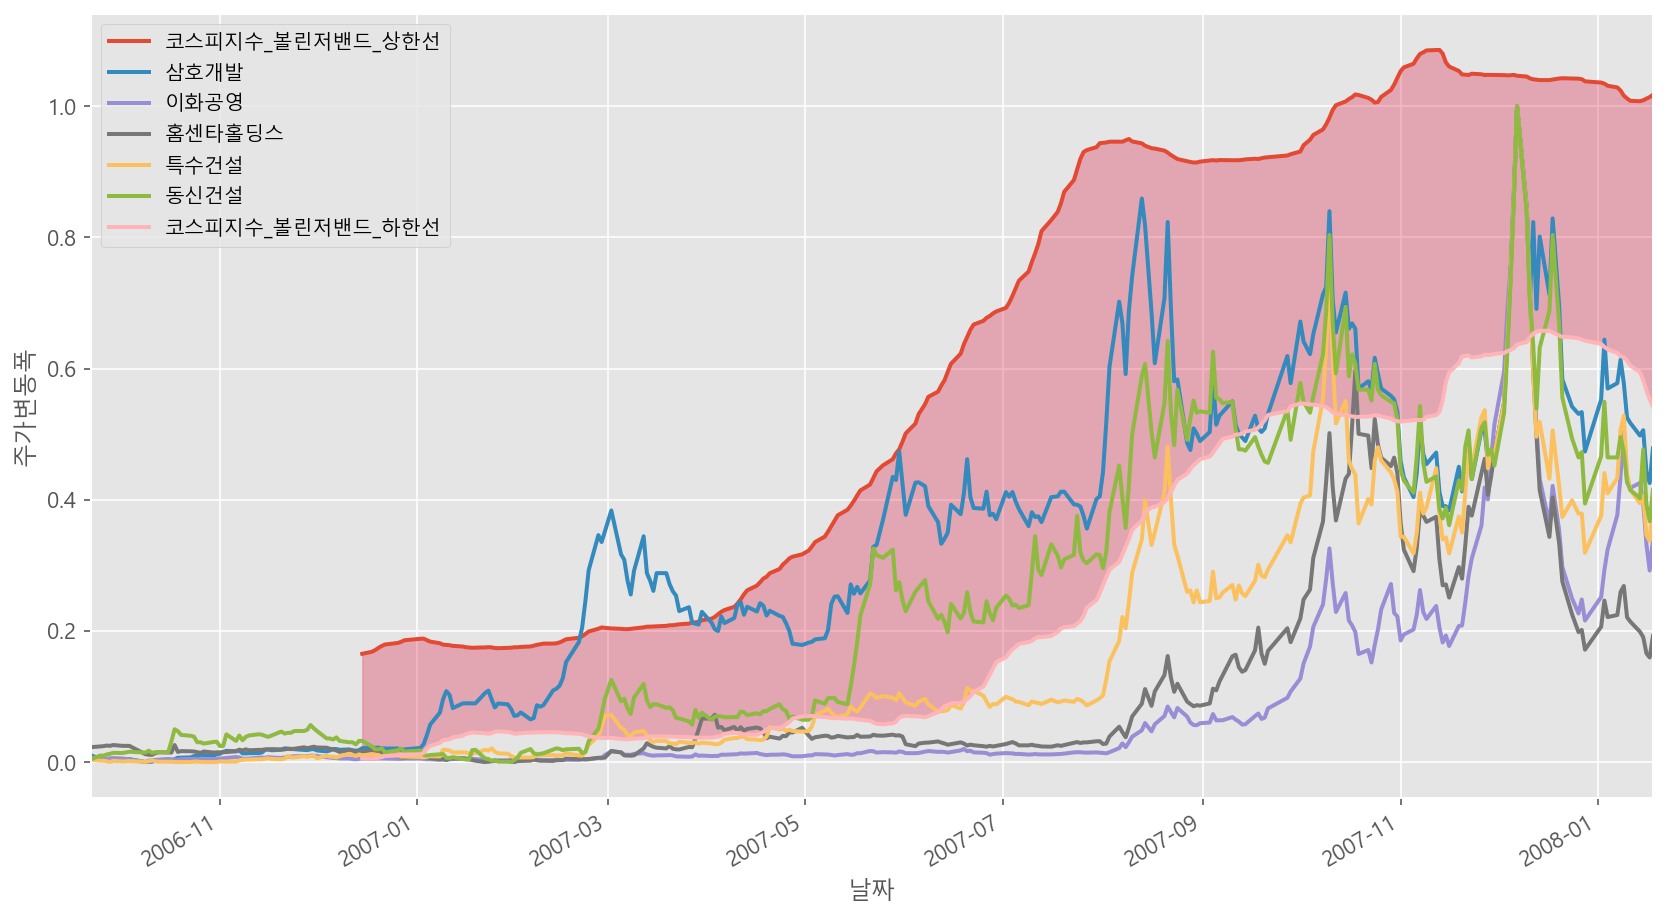

In [16]:
# 주가 기준
lee_norm.reset_index(inplace=True)
lee_norm['Date'] = pd.to_datetime(lee_norm['Date'])
lee_norm.set_index('Date', inplace=True)

lee_norm[["코스피지수_볼린저밴드_상한선", '삼호개발', '이화공영', '홈센타홀딩스', '특수건설', '동신건설', "코스피지수_볼린저밴드_하한선"]].plot(linewidth=2.0, figsize=(14, 8), xlabel='날짜', ylabel='주가변동폭')
plt.fill_between(lee_norm.index, lee_norm.코스피지수_볼린저밴드_하한선, lee_norm.코스피지수_볼린저밴드_상한선, alpha=0.3, color='crimson')
plt.rc('axes', labelsize=16)
plt.xlim('2006-09-22', '2008-01-18')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.rcParams['axes.facecolor'] = 'e5e5e5'
plt.show()

In [ ]:
|